In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb  #sometimes imported as sns

%matplotlib inline

In [2]:
fuel_econ = pd.read_csv('fuel_econ.csv')
print(fuel_econ.shape)
fuel_econ.head(6)

(3929, 20)


,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8
5,32209,Lexus,GS 350,2013,Midsize Cars,Rear-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.5,0,99,19.4325,24.1499,28.2234,38.5000,22.6002,393,6,6


## Scatter

If we want to inspect the relationship between two numeric variables, the standard choice of plot is the scatterplot. In a scatterplot, each data point is plotted individually as a point, its x-position corresponding to one feature value and its y-position corresponding to the second. One basic way of creating a scatterplot is through Matplotlib's scatter function:

Alternative Approach
Seaborn's regplot function combines scatterplot creation with regression function fitting:

Text(0, 0.5, 'Combined fuel eff. (mpg)')

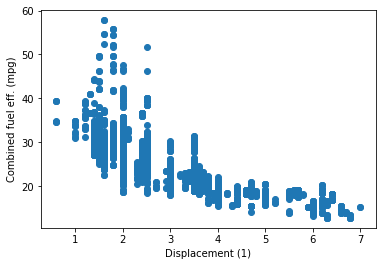

In [4]:
plt.scatter(data = fuel_econ, x = 'displ', y = 'comb');
plt.xlabel('Displacement (1)')
plt.ylabel('Combined fuel eff. (mpg)')

Text(0, 0.5, 'Combined fuel eff. (mpg)')

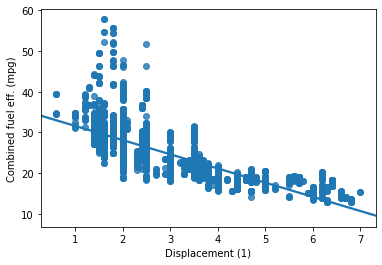

In [5]:
sb.regplot(data = fuel_econ, x = 'displ', y = 'comb');  # similar to matplotlib scatter but adds regression line
plt.xlabel('Displacement (1)')
plt.ylabel('Combined fuel eff. (mpg)')

Look at relationship between fuel efficiency and year of manufacturer.  Have more recent cars got more efficiency

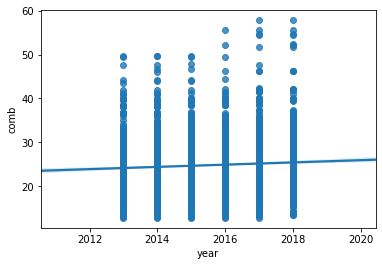

In [6]:
sb.regplot(data = fuel_econ, x = 'year', y = 'comb');  # similar to matplotlib scatter but adds regression line

regression line suggest slight upwards trend in efficiency, but not clear from data as too many data points in each year.

### Jitter
Add jitter to x axis example - only works with regplot not scatter


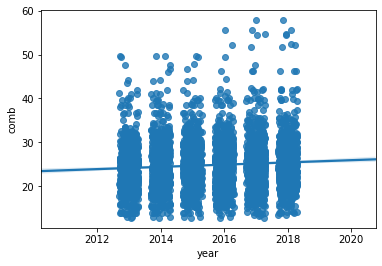

In [7]:
sb.regplot(data = fuel_econ, x = 'year', y = 'comb', x_jitter = 0.3);  # aribtrary jitter n 

Not enough to see distribution of points below mid 30s.  Need to add some transparency.

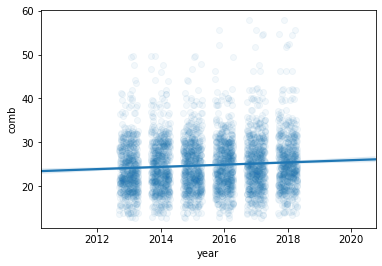

In [11]:
sb.regplot(data = fuel_econ, x = 'year', y = 'comb', x_jitter = 0.3,
          scatter_kws = {'alpha' : 1/20} );  
#if using regplot have to create library and assign to scatter_kws, if was scatter then just use alpha = parameter.  
# alpha takes value between 0 and 1 that specifies opaqueness of points, zero fully transparent, 1 fully opaque

## Heatmap

A heat map is a 2-d version of the histogram that can be used as an alternative to a scatterplot. Like a scatterplot, the values of the two numeric variables to be plotted are placed on the plot axes. Similar to a histogram, the plotting area is divided into a grid and the number of points in each grid rectangle is added up. Since there won't be room for bar heights, counts are indicated instead by grid cell color. A heat map can be implemented with Matplotlib's hist2d function.

Default, each dimensions split into 10 bines & no. of points in each rectangle bin is counted up.
Each count associated with a colour
Default colour - viridis
    lower counts darker purple
    higher counts skew yellow and bright

Text(0, 0.5, 'Combined fuel eff. (mpg)')

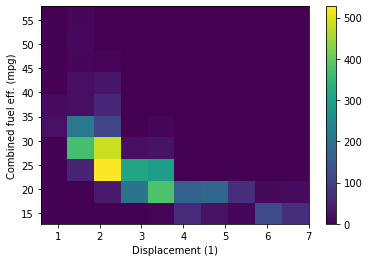

In [12]:
plt.hist2d(data = fuel_econ, x = 'displ', y = 'comb');
plt.colorbar()
plt.xlabel('Displacement (1)')
plt.ylabel('Combined fuel eff. (mpg)')

Set a min bound of counts before a rectangle area can be plotted.
    by setting cmin to a value as example 0.5 any bin with no counts will return NaN and not be coloured in

Now NaN are white, darker purple are associated with higher values.

Text(0, 0.5, 'Combined fuel eff. (mpg)')

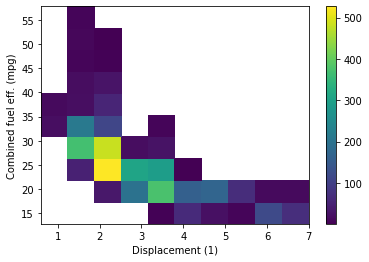

In [13]:
plt.hist2d(data = fuel_econ, x = 'displ', y = 'comb', cmin = 0.5);
plt.colorbar()
plt.xlabel('Displacement (1)')
plt.ylabel('Combined fuel eff. (mpg)')

Text(0, 0.5, 'Combined fuel eff. (mpg)')

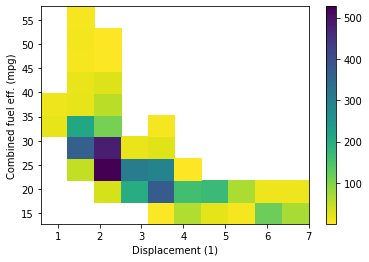

In [17]:
plt.hist2d(data = fuel_econ, x = 'displ', y = 'comb', cmin = 0.5,
          cmap = 'viridis_r');  # reverse color map
plt.colorbar()
plt.xlabel('Displacement (1)')
plt.ylabel('Combined fuel eff. (mpg)')

In [19]:
fuel_econ[['displ', 'comb']].describe()
# run to decide on bins sizes min and max

,displ,comb
count,3929.000000,3929.000000
mean,2.950573,24.791339
std,1.305901,6.003246
min,0.600000,12.821700
25%,2.000000,20.658100
50%,2.500000,24.000000
75%,3.600000,28.227100
max,7.000000,57.782400


Text(0, 0.5, 'Combined fuel eff. (mpg)')

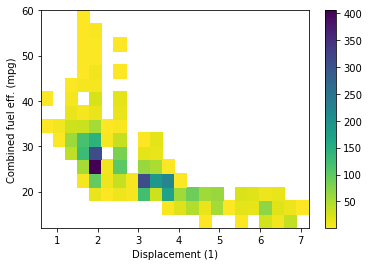

In [20]:
bins_x = np.arange(0.6, 7+0.3, 0.3)
bins_y = np.arange(12, 58+3, 3)
plt.hist2d(data = fuel_econ, x = 'displ', y = 'comb', cmin = 0.5,
          cmap = 'viridis_r', bins = [bins_x, bins_y]);  # reverse color map
plt.colorbar()
plt.xlabel('Displacement (1)')
plt.ylabel('Combined fuel eff. (mpg)')

In [ ]:
# loop through the cell counts and add text annotations for each
for i in range(counts.shape[0]):
    for j in range(counts.shape[1]):
        c = counts[i,j]
        if c >= 7: # increase visibility on darkest cells
            plt.text(bins_x[i]+0.5, bins_y[j]+0.5, int(c),
                     ha = 'center', va = 'center', color = 'white')
        elif c > 0:
            plt.text(bins_x[i]+0.5, bins_y[j]+0.5, int(c),
                     ha = 'center', va = 'center', color = 'black')

### Violin Plots
There are a few ways of plotting the relationship between one quantitative and one qualitative variable, that demonstrate the data at different levels of abstraction. The violin plot is on the lower level of abstraction. For each level of the categorical variable, a distribution of the values on the numeric variable is plotted. The distribution is plotted as a kernel density estimate, something like a smoothed histogram. There is an extra section at the end of the previous lesson that provides more insight into kernel density estimates.

In [21]:
sedan_classes = ['Minicompact Cars', 'Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars']
vclasses = pd.api.types.CategoricalDtype(ordered = True,categories = sedan_classes)
fuel_econ['VClass'] = fuel_econ['VClass'].astype(vclasses);

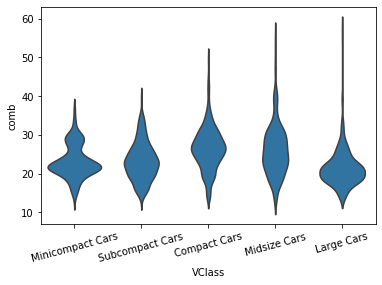

In [27]:
base_color = sb.color_palette()[0]
sb.violinplot(data = fuel_econ, x = 'VClass', y = 'comb',
             color=base_color, inner = None); #orient = what is right vairable for Horizontal
plt.xticks(rotation = 15);

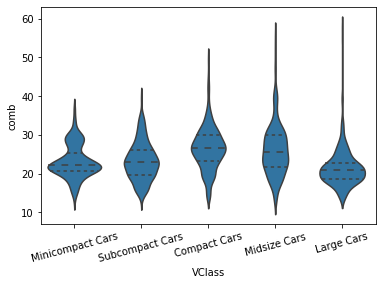

In [34]:
base_color = sb.color_palette()[0]
sb.violinplot(data = fuel_econ, x = 'VClass', y = 'comb',
             color=base_color, inner = 'quartile'); #orient = what is right vairable for Horizontal
plt.xticks(rotation = 15);

### Box Plots
A box plot is another way of showing the relationship between a numeric variable and a categorical variable. Compared to the violin plot, the box plot leans more on summarization of the data, primarily just reporting a set of descriptive statistics for the numeric values on each categorical level. A box plot can be created using seaborn's boxplot function.

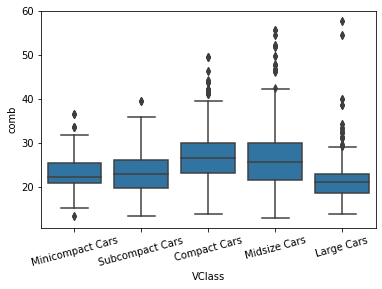

In [33]:
base_color = sb.color_palette()[0]
sb.boxplot(data = fuel_econ, x = 'VClass', y = 'comb',
             color=base_color);
plt.xticks(rotation = 15);

### Alternative Approach (Heat Map)
One alternative way of depicting the relationship between two categorical variables is through a heat map. Heat maps were introduced earlier as the 2-d version of a histogram; here, we're using them as the 2-d version of a bar chart. The seaborn function heatmap is at home with this type of heat map implementation, but the input arguments are unlike most of the visualization functions that have been introduced in this course. Instead of providing the original dataframe, we need to summarize the counts into a matrix that will then be plotted.

In [54]:
fuel_econ['trans_type'] = fuel_econ['trans'].apply(lambda x: x.split()[0])

In [68]:
ct_counts = fuel_econ.groupby(['VClass', 'trans_type']).size()
ct_counts = ct_counts.reset_index(name = 'count')
ct_counts = ct_counts.pivot(index = 'VClass', columns = 'trans_type', values = 'count')

annot = True makes it so annotations show up in each cell, but the default string formatting only goes to two digits of precision. Adding fmt = 'd' means that annotations will all be formatted as integers instead. You can use fmt = '.0f' if you have any cells with no counts, in order to account for NaNs.

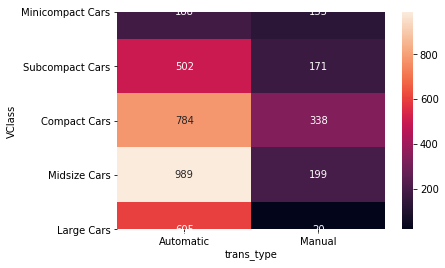

In [69]:
sb.heatmap(data = ct_counts, annot = True, fmt = 'd');

### Clustered Bar Charts
To depict the relationship between two categorical variables, we can extend the univariate bar chart seen in the previous lesson into a clustered bar chart. Like a standard bar chart, we still want to depict the count of data points in each group, but each group is now a combination of labels on two variables. So we want to organize the bars into an order that makes the plot easy to interpret. In a clustered bar chart, bars are organized into clusters based on levels of the first variable, and then bars are ordered consistently across the second variable within each cluster. This is easiest to see with an example, using seaborn's countplot function. To take the plot from univariate to bivariate, we add the second variable to be plotted under the "hue" argument:

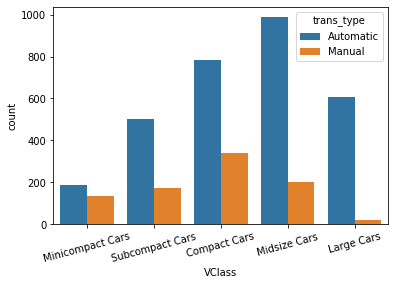

In [66]:
ax = sb.countplot(data = fuel_econ, x = 'VClass', hue = 'trans_type')
plt.xticks(rotation = 15);
#ax.legend(loc = 8, ncol = 3, framealpha = 1, title = 'Transmission')  can move legend using .legend notation

### Faceting
One general visualization technique that will be useful for you to know about to handle plots of two or more variables is faceting. In faceting, the data is divided into disjoint subsets, most often by different levels of a categorical variable. For each of these subsets of the data, the same plot type is rendered on other variables. Faceting is a way of comparing distributions or relationships across levels of additional variables, especially when there are three or more variables of interest overall

Seaborn's FacetGrid class facilitates the creation of faceted plots. There are two steps involved in creating a faceted plot. First, we need to create an instance of the FacetGrid object and specify the feature we want to facet by ("cat_var" in our example). Then we use the map method on the FacetGrid object to specify the plot type and variable(s) that will be plotted in each subset (in this case, histogram on "num_var").

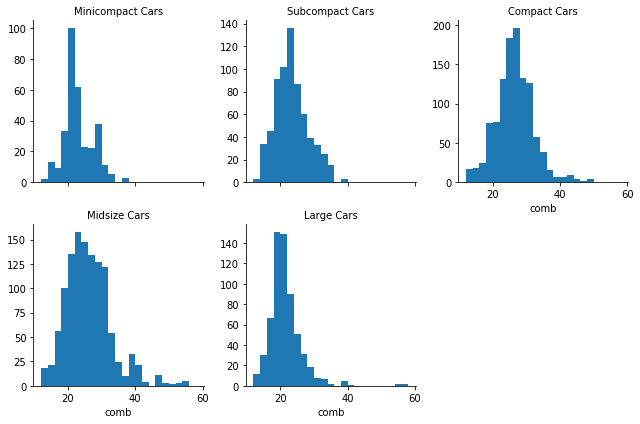

In [77]:
bins = np.arange(12, 58+2, 2)
g = sb.FacetGrid(data = fuel_econ, col = 'VClass', col_wrap = 3, sharey = False); # one plot for each level of vehicle class
g.map(plt.hist, 'comb', bins = bins);
g.set_titles('{col_name}');

### Adapted Bar Charts
Histograms and bar charts can be adapted for use as bivariate plots by, instead of indicating count by height, indicating a mean or other statistic on a second variable.

For example, we could plot a numeric variable against a categorical variable by adapting a bar chart so that its bar heights indicate the mean of the numeric variable. This is the purpose of seaborn's barplot function:

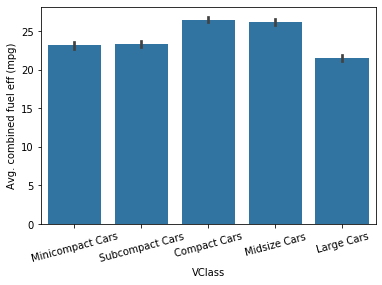

In [79]:
base_color = sb.color_palette()[0]
sb.barplot(data = fuel_econ, x = 'VClass', y = 'comb', color = base_color);
plt.xticks(rotation = 15);
plt.ylabel('Avg. combined fuel eff (mpg)');

As an alternative, the pointplot function can be used to plot the averages as points rather than bars. This can be useful if having bars in reference to a 0 baseline aren't important or would be confusing.

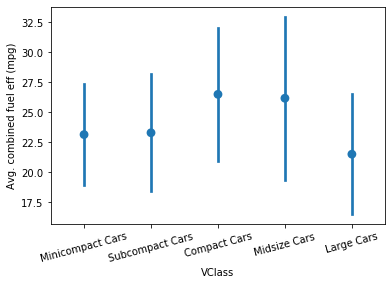

In [81]:
sb.pointplot(data = fuel_econ, x = 'VClass', y = 'comb', ci = 'sd', linestyles = ""); # ci = sd sets bars to show std dev.
plt.xticks(rotation = 15);
plt.ylabel('Avg. combined fuel eff (mpg)');

### Line Plots
The line plot is a fairly common plot type that is used to plot the trend of one numeric variable against values of a second variable. In contrast to a scatterplot, where all data points are plotted, in a line plot, only one point is plotted for every unique x-value or bin of x-values (like a histogram). If there are multiple observations in an x-bin, then the y-value of the point plotted in the line plot will be a summary statistic (like mean or median) of the data in the bin. The plotted points are connected with a line that emphasizes the sequential or connected nature of the x-values.

If the x-variable represents time, then a line plot of the data is frequently known as a time series plot. Often, we have only one observation per time period, like in stock or currency charts. While there is a seaborn function tsplot that is intended to be used with time series data, it is fairly specialized and (as of this writing's seaborn 0.8) is slated for major changes.

Instead, we will make use of Matplotlib's errorbar function, performing some processing on the data in order to get it into its necessary form.

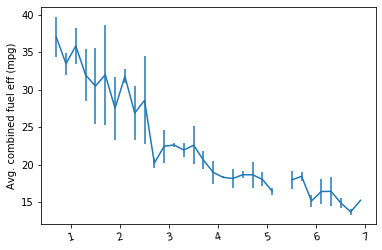

In [90]:
plt.errorbar(x = bins_c, y = comb_mean, yerr = comb_std); # ci = sd sets bars to show std dev.
plt.xticks(rotation = 15);
plt.ylabel('Avg. combined fuel eff (mpg)');

In [89]:
bins_e = np.arange(0.6, 7+0.2, 0.2)
bins_c = bins_e[:-1]+0.1

displ_binned = pd.cut(fuel_econ['displ'], bins_e, include_lowest = True)
comb_mean = fuel_econ['comb'].groupby(displ_binned).mean()
comb_std = fuel_econ['comb'].groupby(displ_binned).std()